In [ ]:
# A churn model is a mathematical representation of how churn impacts your business. 
# Churn calculations are built on existing data (the number of customers who left your service during a given time period). 
# A predictive churn model extrapolates on this data to show future potential churn rates.

# Usi`ng the existing bank data we need to predict customers who would be leaving the bank in future

In [1]:
# Artifical Neural Networok

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [49]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
# Splitting X and y varibales

X= dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [51]:
# Create dummy variable

geography= pd.get_dummies(X["Geography"])
gender=pd.get_dummies(X['Gender'])

In [52]:
# Concatenating dummy variable with the X 

X=pd.concat([X,geography,gender],axis=1)

In [53]:
# Drop the original Geography and gender column
X=X.drop(['Geography','Gender'],axis=1)

In [54]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [55]:
# splitting data into traina dn test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
#Feature Scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [79]:
#Creating an ANN

# Initializing the ANN

classifier= Sequential()

classifier.add(Dense(units=10, kernel_initializer='he_normal',activation='relu'))  #first hidden layer has 6 neurons
classifier.add(Dropout(0.3)) adding the dropout  layer
classifier.add(Dense(units=20, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=15, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')) #output layer


In [80]:
# Compiling thhe Model

classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
# Fitting the ANN to the training set

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7783 - val_loss: 0.4663 - val_accuracy: 0.7970
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.7914 - val_loss: 0.4538 - val_accuracy: 0.7982
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.7994 - val_loss: 0.4419 - val_accuracy: 0.7989
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.8048 - val_loss: 0.4420 - val_accuracy: 0.8027
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8016 - val_loss: 0.4351 - val_accuracy: 0.8016
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4524 - accuracy: 0.8059 - val_loss: 0.4353 - val_accuracy: 0.8137
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7981 - val_loss: 0.4294 - val_accuracy: 0.8061

In [82]:
# Predicting Test Reults

y_pred=classifier.predict(X_test)
y_pred=y_pred>0.5

In [83]:
# Making a Confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1554,   41],
       [ 225,  180]])

In [84]:
# Calculate Accuracy

score=accuracy_score(y_test,y_pred)
score

0.867

In [85]:
classifier.summary()  # details of ANN architecture

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                140       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 15)                315       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

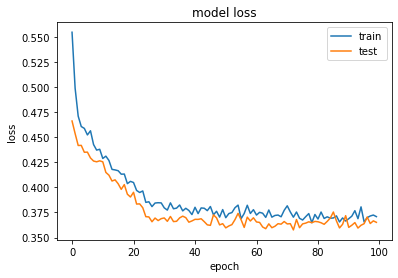

In [86]:
#summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()